# Probabilistic classification

Interview Questions

1. What is the purpose of the EM algorithm?

- To iteratively estimate parameters of models with unobserved variables, such as GMMs.

2. How does GMM differ from K-Means?

- GMM models data as a mixture of Gaussian distributions and provides probabilistic cluster assignments. K-Means uses hard assignments and minimizes intra-cluster variance.

3. What are the advantages of probabilistic clustering?

- It handles overlapping clusters, provides soft assignments, and incorporates uncertainty.

4. How do you determine the number of clusters in a GMM?

- Use criteria like BIC or cross-validation.

1. What is the difference between EM and CEM?

- EM computes soft assignments (posterior probabilities).
- CEM assigns each data point to the cluster with the highest probability (hard assignments).

2. Why is BIC used for model selection?

- BIC balances model fit and complexity, penalizing overfitting.

3. How does ICL differ from BIC?

- ICL adjusts BIC to include classification uncertainty, favoring models with more definitive cluster assignments.

4. Does CEM reduce to K-Means for spherical clusters?

- Yes. When classes are assumed to have spherical covariance matrices, CEM simplifies to K-Means clustering.

5. What is the intuition behind EM?

- EM iteratively improves model parameters by alternating between "estimating" latent variables and maximizing the likelihood.

## Programme K-Means

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def create_data_clusters (n, pi, mu, sigma : list):
    # mu: list of 2d tuples
    # sigma: list of 2x2 matrices
    
    k = len(pi)
    data_list = []
    labels = []
    for i in range(k):
        data = np.random.multivariate_normal(mu[i], sigma[i], int(n*pi[i]))
        data_list.append(data)
        labels.extend([i]*int(n*pi[i]))
    
    return np.vstack(data_list), np.array(labels)

<Axes: >

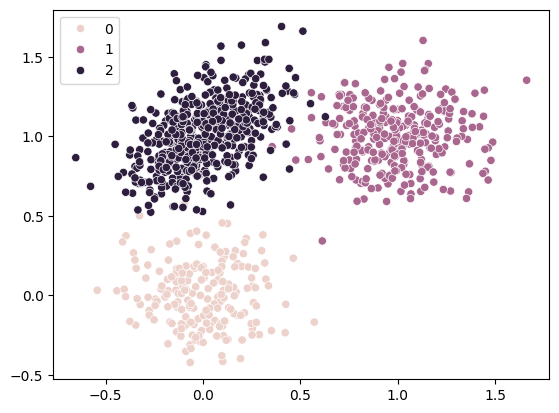

In [4]:
mu1 = np.array([0, 0])
mu2 = np.array([1, 1])
mu3 = np.array([0, 1])
sigma1 = np.array([[1, 0], [0, 1]]) * 0.2 ** 2
sigma2 = np.array([[1, 0], [0, 1]]) * 0.2 ** 2
sigma3 = np.array([[1, 0.5], [0.5, 1]]) * 0.2 ** 2
pi = [0.2, 0.3, 0.5]
n = 1000
data, labels = create_data_clusters(n, pi, [mu1, mu2, mu3], [sigma1, sigma2, sigma3])
sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels)

## P-2

In [5]:
def k_means(X, K=3, max_number_of_iterations=1000, tol=1e-4, verbose=True):
    # X: data n x 2
    # k: number of clusters
    
    """ 
    The algorith of k means is CEM but with the E step replaced with a hard assignment
    It is assumed that the normal distribution is isotropic.
    It is assumed that the clusters are equally distributed.
    """
    
    n_samples, n_features = X.shape
    
    # Initialize centroids randomly
    centroids = X[np.random.choice(n_samples, K, replace=False)]
    
    
    for i in range(max_number_of_iterations):
        centroids_old = centroids.copy()
        
        #step 2 (C step)
        distance = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distance, axis = 1)
        
        # step 3 (M step)
        # update the centroids
        for k in range(K):
            if np.any(labels == k):
                centroids[k] = np.mean(X[labels == k], axis=0)
            else:
                #random reinitialization
                centroids[k] = X[np.random.choice(n_samples)]
                
        # step 4: convergence check
        centroid_shifts = np.linalg.norm(centroids - centroids_old, axis=1)
        if np.max(centroid_shifts) < tol:
            if verbose:
                print(f"Converged after {i} iterations")
            break
    # If the code runs all the for loop without a break, runs else
    else:
        print(f"Reach max number of iterations {max_number_of_iterations}")
    
    return centroids, labels


def align_label_and_centroids (centroids, labels):
    
    # Find the centroid closest to [-2, 0]
    target_point = np.array([-2, 0])
    distances = np.linalg.norm(centroids - target_point, axis=1)
    closest_centroid_index = np.argmin(distances)

    # Apply the label 0 to the closest centroid's labels and 1 to the other set
    new_labels = np.where(labels == closest_centroid_index, 0, 1)
    return new_labels
    

In [6]:
centroids, labels = k_means(data, K=3, tol=1e-4)
centroids

Converged after 8 iterations


array([[7.18099638e-04, 1.03841390e-02],
       [6.59371731e-03, 1.00881066e+00],
       [9.98907382e-01, 1.01015920e+00]])

<Axes: >

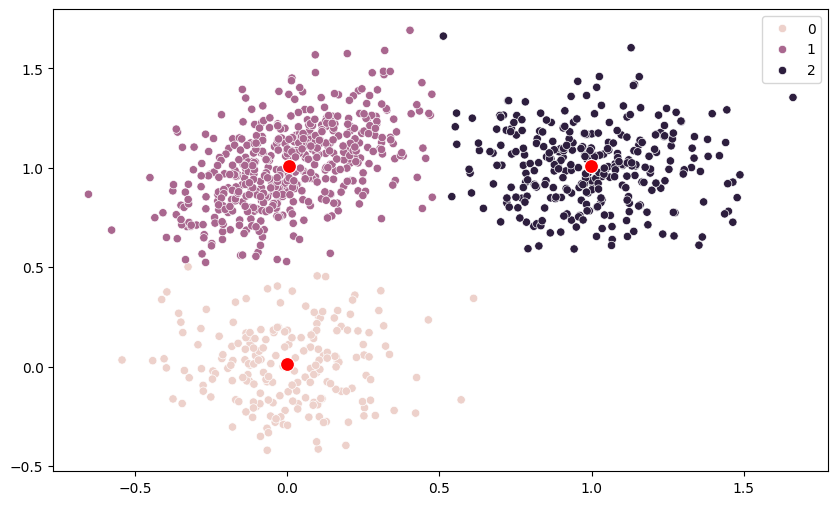

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], s=100, color='red')

## P-3

### Data

In [7]:
mu1 = np.array([-2, 0])

mu21 = np.array([1.1, 0]) # 6% error
mu22 = np.array([0, 0])   # 16% error
mu23 = np.array([-0.6, 0])   # 26% error

sigma1 = np.array([[1, 0], [0, 1]])
sigma2 = np.array([[1, 0], [0, 1]])
pi = [0.5, 0.5]
n = 1000
data1, labels1 = create_data_clusters(n, pi, [mu1, mu21], [sigma1, sigma2])
data2, labels2 = create_data_clusters(n, pi, [mu1, mu22], [sigma1, sigma2])
data3, labels3 = create_data_clusters(n, pi, [mu1, mu23], [sigma1, sigma2])

<Axes: >

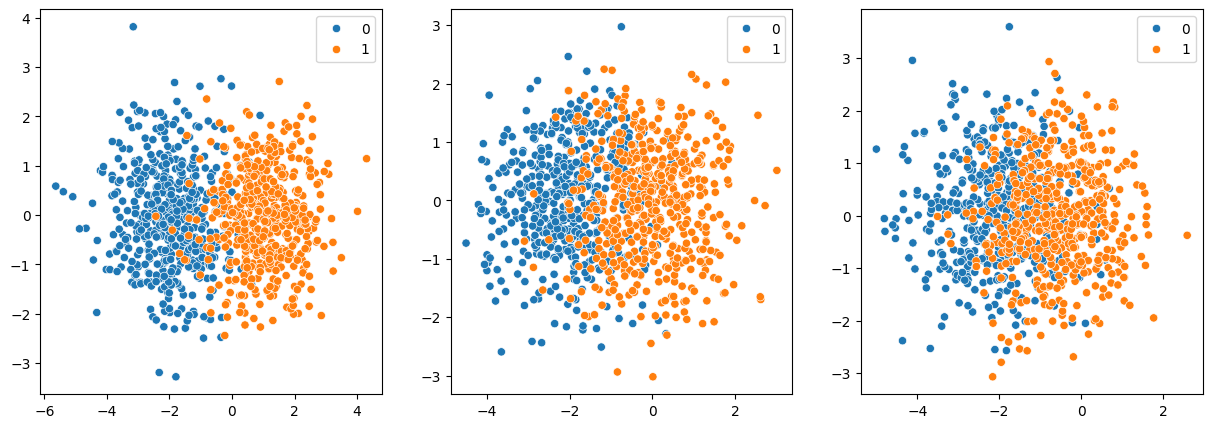

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=data1[:,0], y=data1[:,1], hue=labels1)
plt.subplot(1, 3, 2)
sns.scatterplot(x=data2[:,0], y=data2[:,1], hue=labels2)
plt.subplot(1, 3, 3)
sns.scatterplot(x=data3[:,0], y=data3[:,1], hue=labels3)

Converged after 6 iterations


<Axes: >

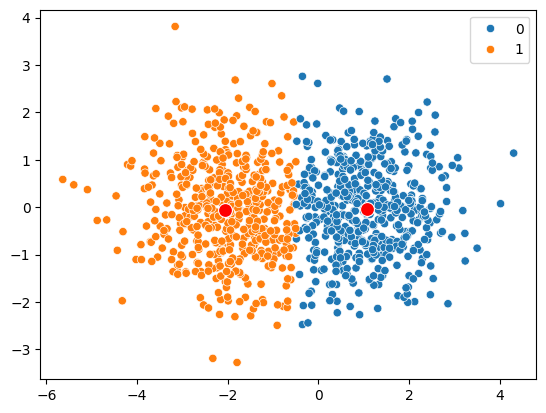

In [9]:
centroids, pred_labels = k_means(data1, K=2, tol=1e-4)

sns.scatterplot(x=data1[:,0], y=data1[:,1], hue=pred_labels)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], s=100, color='red')

we are going to implement a metric to evaluate the performance of the model

Cluster variance and accuracy.

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def cluster_variance (data, centroids, labels):
    K = centroids.shape[0]
    n_samples = data.shape[0]
    variance = 0
    for k in range(K):
        variance += np.sum(np.linalg.norm(data[labels == k] - centroids[k])**2)
    return variance / n_samples

In [11]:
n_test = 1000
variances = []
accuracies = []

for i_test in range(n_test):
    centroids, pred_labels = k_means(data1, K=2, tol=1e-4, verbose=False)
    variances.append(cluster_variance(data1, centroids, pred_labels))
    
    new_labels = align_label_and_centroids(centroids, pred_labels)
    accuracies.append(accuracy_score(labels1, new_labels))

print("Intra cluster variance", round(np.mean(variances) , 4),  "+-", round(np.std(variances), 6))
print("Accuracy", round(np.mean(accuracies) * 100, 2), "+-", round(100*np.std(accuracies),2))  

Intra cluster variance 1.7805 +- 1e-05
Accuracy 93.6 +- 0.0


| Aspect | k-means | k-means++ |
| --- | --- | --- |
| Initialization | Random centroids | Smart centroids (spread out) |
| Performance Guarantee | None | 𝑂(log⁡𝐾) approximation |
| Speed of Convergence | Slower in some cases | Generally faster |
| Cluster Quality | May depend on initialization | Consistently better |

In [12]:
def k_means_pp (X, K=3, max_number_of_iterations = 1000, verbose=True, tol=1e-4): 
    n_samples, n_features = X.shape
    
    # Kmeans++ initialization
    # The difference is that we impose that each
    # centroid is at a distance at least d from the others
    # with a certain probability
    
    #This leads to a better convergence
    
    # Step 1: Choose the first centroid uniformly at random
    centroids = np.zeros((K, n_features))
    centroids[0] = X[np.random.choice(n_samples)]
    
    for i in range(1, K):
        #compute distances to nearest centroid
        distances = np.min([np.linalg.norm(X - c, axis=1)**2 for c in centroids], axis=0)
        probabilities = distances / np.sum(distances)
        next_centroid = X[np.random.choice(n_samples, p=probabilities)]
        centroids[i] = next_centroid
        
    
    for i in range(max_number_of_iterations):
        centroids_old = centroids.copy()
        
        #step 2 (C step)
        distance = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distance, axis = 1)
        
        # step 3 (M step)
        # update the centroids
        for k in range(K):
            if np.any(labels == k):
                centroids[k] = np.mean(X[labels == k], axis=0)
            else:
                #random reinitialization
                centroids[k] = X[np.random.choice(n_samples)]
                
        # step 4: convergence check
        centroid_shifts = np.linalg.norm(centroids - centroids_old, axis=1)
        if np.max(centroid_shifts) < tol:
            if verbose:
                print(f"Converged after {i} iterations")
            break
    # If the code runs all the for loop without a break, runs else
    else:
        print(f"Reach max number of iterations {max_number_of_iterations}")
    
    return centroids, labels

Converged after 4 iterations
1.7804621652279888


<Axes: >

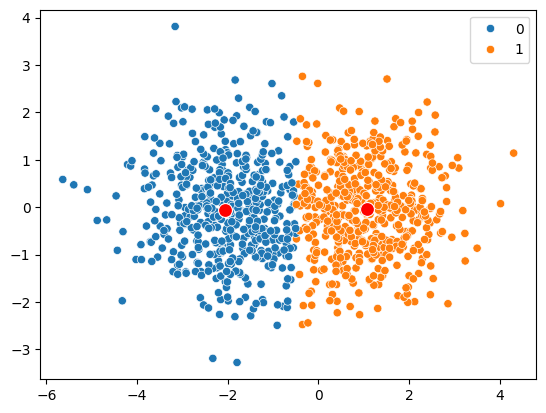

In [13]:
centroids, pred_labels = k_means_pp(data1, K=2, tol=1e-4)

print(cluster_variance(data1, centroids, pred_labels))
sns.scatterplot(x=data1[:,0], y=data1[:,1], hue=pred_labels)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], s=100, color='red')

In [14]:
n_test = 1000
variances = []
accuracies = []

for i_test in range(n_test):
    centroids, pred_labels = k_means_pp(data1, K=2, tol=1e-4, verbose=False)
    variances.append(cluster_variance(data1, centroids, pred_labels))
    
    new_labels = align_label_and_centroids(centroids, pred_labels)
    accuracies.append(accuracy_score(labels1, new_labels))

print("Intra cluster variance", round(np.mean(variances) , 4),  "+-", round(np.std(variances), 6))
print("Accuracy", round(np.mean(accuracies) * 100, 2), "+-", round(100*np.std(accuracies),2))  

Intra cluster variance 1.7805 +- 1e-05
Accuracy 93.6 +- 0.0


There are no significicant improvemnts between using Kmeans and Kmeans++ in this case.

### Testing with the different datasets

In [15]:
def test_model_with_data (data, labels, K=2, n_test=5000):
    variances = []
    accuracies = []

    for i_test in range(n_test):
        centroids, pred_labels = k_means_pp(data, K=K, tol=1e-4, verbose=False)
        variances.append(cluster_variance(data, centroids, pred_labels))

        new_labels = align_label_and_centroids(centroids, pred_labels)
        accuracies.append(accuracy_score(labels, new_labels))

    print("Kmeans++: Intra cluster variance", round(np.mean(variances) , 4),  "+-", round(np.std(variances), 8))
    print("Kmeans++: Accuracy", round(np.mean(accuracies) * 100, 2), "+-", round(100*np.std(accuracies),2))
    
    variances = []
    accuracies = []

    for i_test in range(n_test):
        centroids, pred_labels = k_means(data, K=K, tol=1e-4, verbose=False)
        variances.append(cluster_variance(data, centroids, pred_labels))

        new_labels = align_label_and_centroids(centroids, pred_labels)
        accuracies.append(accuracy_score(labels, new_labels))

    print("Kmeans: Intra cluster variance", round(np.mean(variances) , 4),  "+-", round(np.std(variances), 8))
    print("Kmeans: Accuracy", round(np.mean(accuracies) * 100, 2), "+-", round(100*np.std(accuracies),2))

Dataset 1:

In [16]:
test_model_with_data(data1, labels1, K=2)

Kmeans++: Intra cluster variance 1.7805 +- 9.68e-06
Kmeans++: Accuracy 93.6 +- 0.0
Kmeans: Intra cluster variance 1.7805 +- 9.84e-06
Kmeans: Accuracy 93.6 +- 0.0


Dataset 2:

In [17]:
test_model_with_data(data2, labels2, K=2)

Kmeans++: Intra cluster variance 1.5344 +- 0.0
Kmeans++: Accuracy 84.2 +- 0.0
Kmeans: Intra cluster variance 1.5344 +- 0.0
Kmeans: Accuracy 84.2 +- 0.0


Dataset 3:

In [18]:
test_model_with_data(data3, labels3, K=2)

Kmeans++: Intra cluster variance 1.5618 +- 0.00703251
Kmeans++: Accuracy 76.39 +- 0.57
Kmeans: Intra cluster variance 1.5616 +- 6.794e-05
Kmeans: Accuracy 76.42 +- 0.17


# Gaussian Mixture Model GMM

In [33]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

<Axes: >

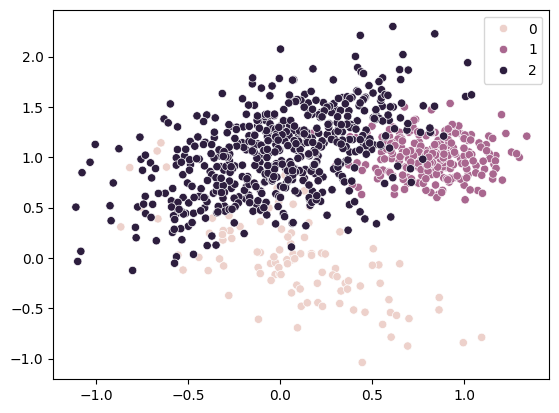

In [42]:
mu1 = np.array([0, 0])
mu2 = np.array([0.8, 1])
mu3 = np.array([0, 1])
sigma1 = np.array([[1, -0.7], [-0.7, 1]]) * 0.4 ** 2
sigma2 = np.array([[1, 0], [0, 1]]) * 0.2 ** 2
sigma3 = np.array([[1, 0.5], [0.5, 1]]) * 0.4 ** 2
pi = [0.1, 0.25, 0.55]
n = 1000
data, labels = create_data_clusters(n, pi, [mu1, mu2, mu3], [sigma1, sigma2, sigma3])
sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels)

<Axes: >

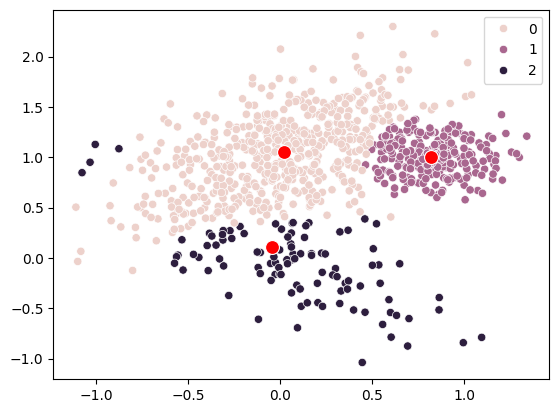

In [43]:
# Covariance type can be 'full', 'tied', 'diag', 'spherical'
gmm = GaussianMixture(n_components=3, covariance_type='full', max_iter=1000) 
gmm.fit(data)
pred_labels_gmm = gmm.predict(data)
sns.scatterplot(x=data[:,0], y=data[:,1], hue=pred_labels_gmm)
sns.scatterplot(x=gmm.means_[:,0], y=gmm.means_[:,1], s=100, color='red')

Now with kmm

Text(0.5, 1.0, 'Kmeans++ initialization')

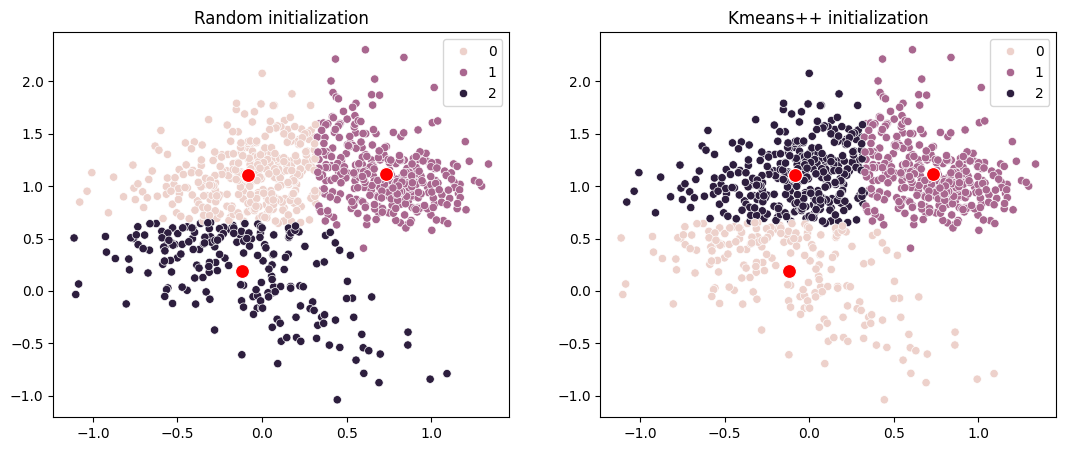

In [44]:
kmeans_random = KMeans(n_clusters=3, init='random', max_iter=1000)
kmeans_random.fit(data)
pred_labels_kmeans_random = kmeans_random.predict(data)

kmeans_plus = KMeans(n_clusters=3, init='k-means++', max_iter=1000)
kmeans_plus.fit(data)
pred_labels_kmeans_plus = kmeans_plus.predict(data)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=data[:,0], y=data[:,1], hue=pred_labels_kmeans_random)
sns.scatterplot(x=kmeans_random.cluster_centers_[:,0], y=kmeans_random.cluster_centers_[:,1], s=100, color='red')
plt.title("Random initialization")
plt.subplot(1, 3, 2)
sns.scatterplot(x=data[:,0], y=data[:,1], hue=pred_labels_kmeans_plus)
sns.scatterplot(x=kmeans_plus.cluster_centers_[:,0], y=kmeans_plus.cluster_centers_[:,1], s=100, color='red')
plt.title("Kmeans++ initialization")

### Comparing

Text(0.5, 1.0, 'Kmeans++ initialization')

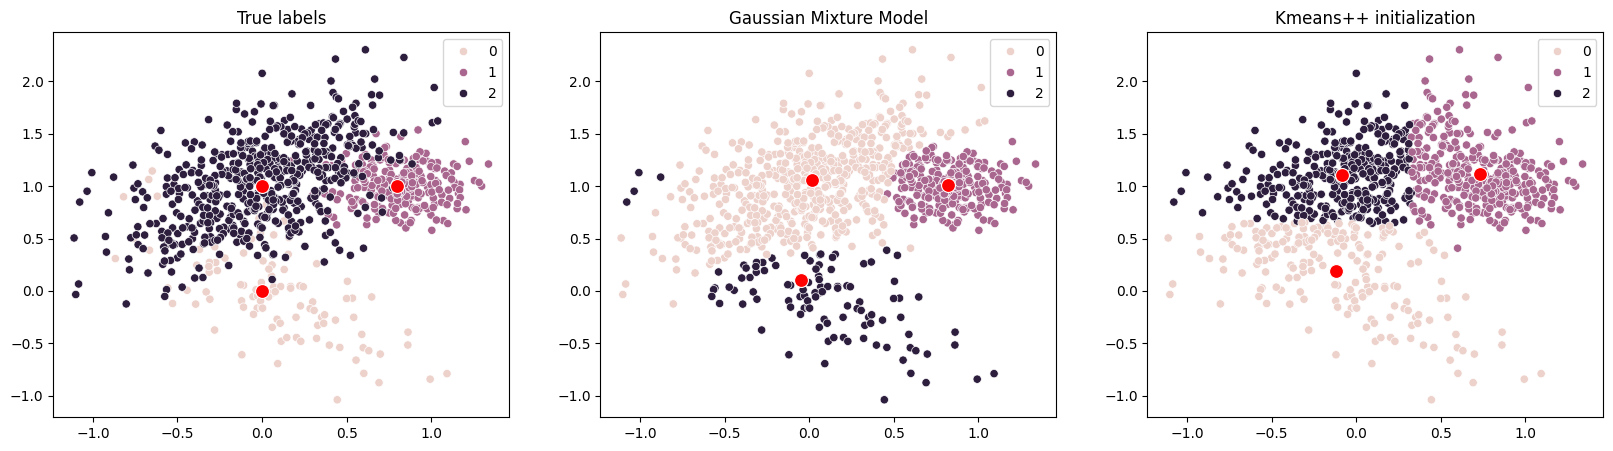

In [45]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels)
sns.scatterplot(x=[mu1[0], mu2[0], mu3[0]], y=[mu1[1], mu2[1], mu3[1]], s=100, color='red')
plt.title("True labels")
plt.subplot(1, 3, 2)
sns.scatterplot(x=data[:,0], y=data[:,1], hue=pred_labels_gmm)
sns.scatterplot(x=gmm.means_[:,0], y=gmm.means_[:,1], s=100, color='red')
plt.title("Gaussian Mixture Model")
plt.subplot(1, 3, 3)
sns.scatterplot(x=data[:,0], y=data[:,1], hue=pred_labels_kmeans_plus)
sns.scatterplot(x=kmeans_plus.cluster_centers_[:,0], y=kmeans_plus.cluster_centers_[:,1], s=100, color='red')
plt.title("Kmeans++ initialization")
